<p>
<center>
<font size="5">
Project: Plant Seedling Classification
</font>
</center>
</p>

<p>
<center>
<font size="3">
Ruiqi Li
</font>
</center>
</p>
</b>

# Introduction

Increasing the crop yield is crucial for the humanity. When the agriculture is improving, the weed control becomes a huge topic. "Weeds compete with crops for sunlight, water, nutrients, and space. In addition, they harbor insects and pathogens, which attack crop plants. Furthermore, they destroy native habitats, threatening native plants and animals" (Chauhan, paragraph 1).

This project focuses on applying different Convolutional Neural Networks to distinguish the species of a seedling, and main problem is to figure out which CNN has the relatively best performance. The data is from an open-sourced Kaggle dataset with 960 plants from 12 species (4750 images in total). I want to classify weed seedlings and crop seedlings by computer vision techniques.



Below is example images of seedlings. Top left is wheat, top right is mayweed, bottom left is maize, and bottom right is chickenweed.

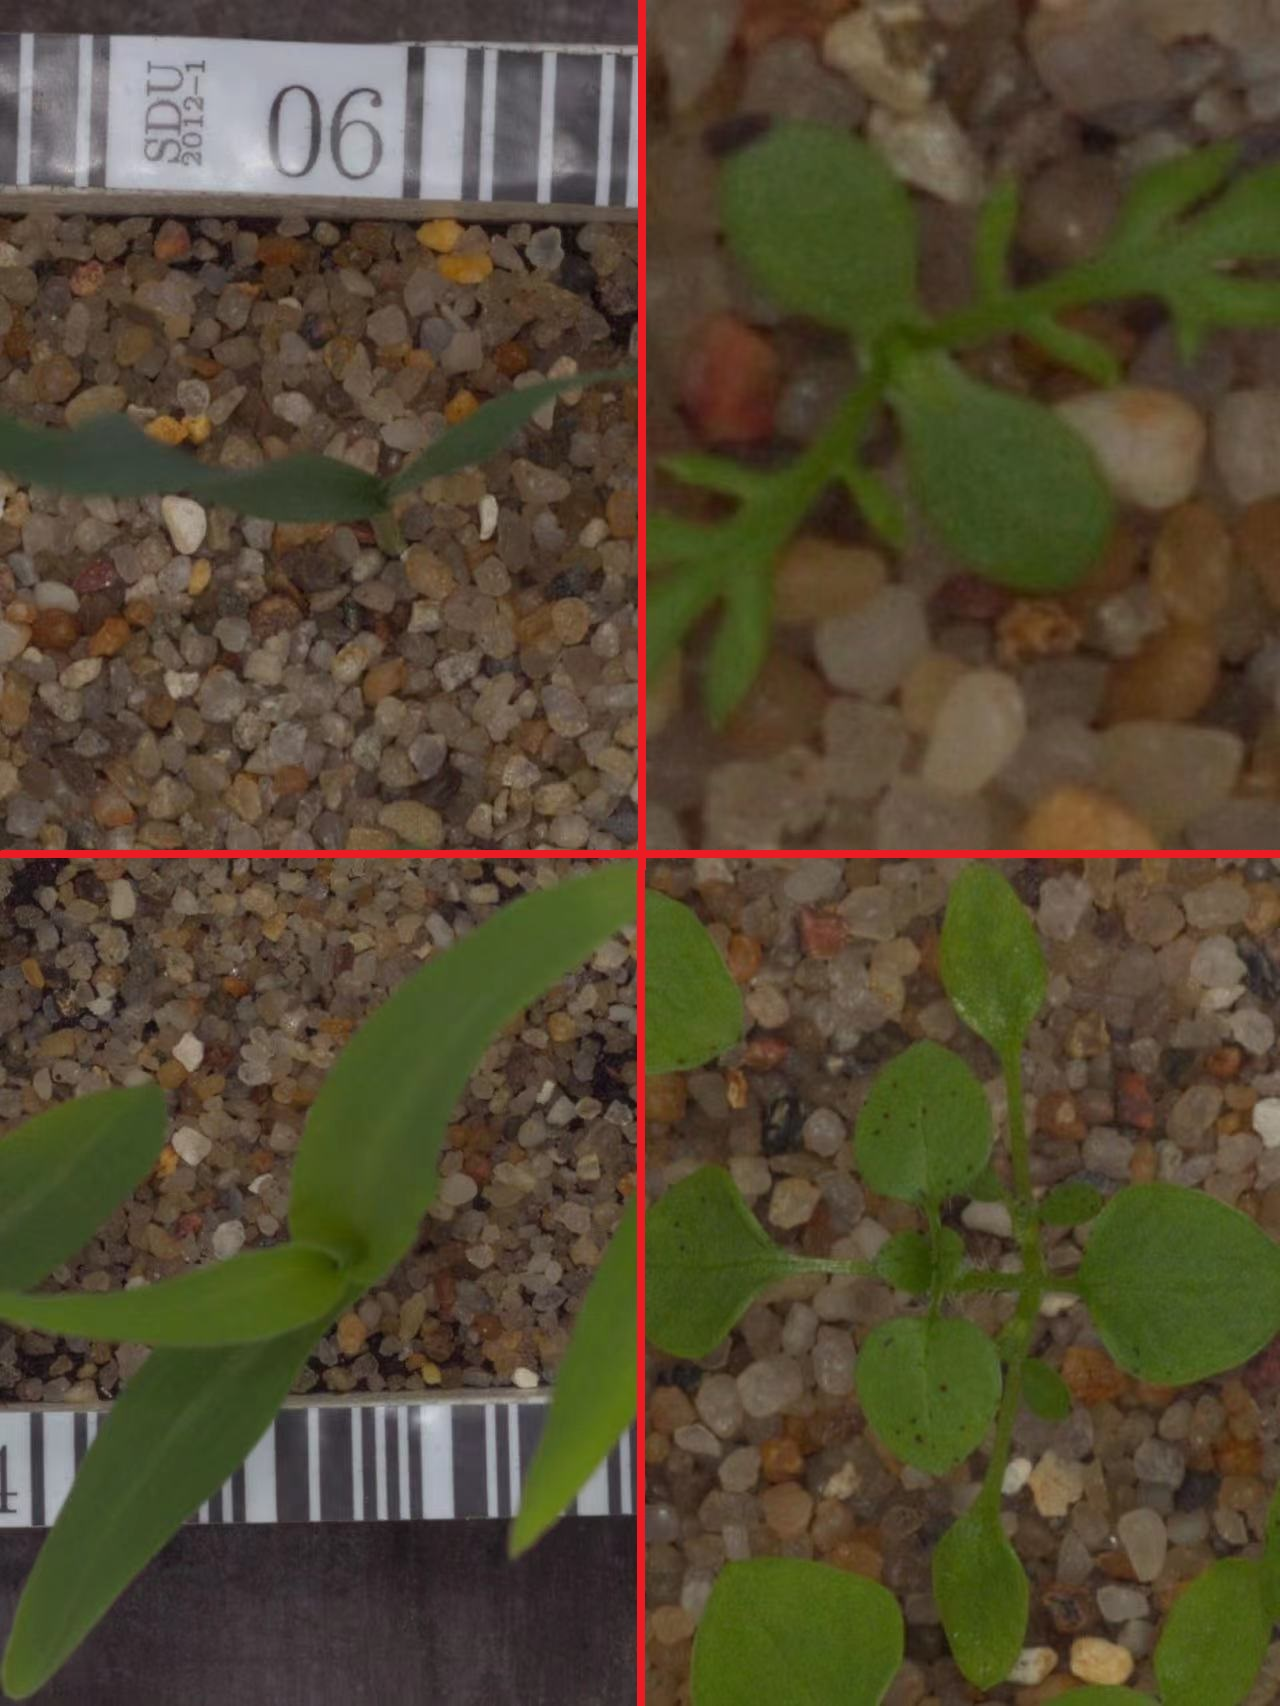

# Experiment

## Preparations

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/machine_learning_I/homework/final_project/'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/machine_learning_I/utilities/'

Mounted at /content/drive


In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd 
import os 
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

### Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/machine_learning_I/utilities


### Read the training, validation and testing data

### Set the path for data

In [ ]:
# Set the path for data
train_path = "/content/drive/My Drive/Colab Notebooks/machine_learning_I/homework/final_project/data/train/"
test_path = "/content/drive/My Drive/Colab Notebooks/machine_learning_I/homework/final_project/data"

### Check the images number

In [ ]:
# Check the number of images
for dirpath, dirnames, filenames in os.walk("/content/drive/My Drive/Colab Notebooks/machine_learning_I/homework/final_project/data/"): 
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 3 images in '/content/drive/My Drive/Colab Notebooks/machine_learning_I/homework/final_project/data/'.
There are 0 directories and 794 images in '/content/drive/My Drive/Colab Notebooks/machine_learning_I/homework/final_project/data/test'.
There are 12 directories and 0 images in '/content/drive/My Drive/Colab Notebooks/machine_learning_I/homework/final_project/data/train'.
There are 0 directories and 263 images in '/content/drive/My Drive/Colab Notebooks/machine_learning_I/homework/final_project/data/train/Black-grass'.
There are 0 directories and 390 images in '/content/drive/My Drive/Colab Notebooks/machine_learning_I/homework/final_project/data/train/Charlock'.
There are 0 directories and 287 images in '/content/drive/My Drive/Colab Notebooks/machine_learning_I/homework/final_project/data/train/Cleavers'.
There are 0 directories and 611 images in '/content/drive/My Drive/Colab Notebooks/machine_learning_I/homework/final_project/data/train/Common Chickwee

### Reading, shuffling, batching the data

In [ ]:
# Read training data
data_train = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=True,
                                                                 image_size=(224,224),
                                                                batch_size = 16,
                                                                 seed=42,
                                                                validation_split=0.2,
                                                                   subset="training")

# Read validation data
data_valid = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=False,
                                                                 image_size=(224,224),
                                                                batch_size = 16,
                                                                 seed=42,
                                                                validation_split=0.2,
                                                                   subset="validation")



Found 4750 files belonging to 12 classes.
Using 3800 files for training.
Found 4750 files belonging to 12 classes.
Using 950 files for validation.


In [ ]:
# Read testing data
datagen = ImageDataGenerator()
data_test = datagen.flow_from_directory(test_path ,shuffle =False,batch_size=100,
                              target_size = (224,224),classes = ['test'])

Found 794 images belonging to 1 classes.


### Labels of images

In [ ]:
class_names = data_train.class_names
n_classes = len(class_names)
print(n_classes)
class_names

12


['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

## Training Section

Use transfer learning and try 7 different pre-trained models to see the effect of different pretrained model
1. EfficientNetB0
2. MobileNet
3. ResNet50V2
4. inception_resnet_v2
5. VGG16
6. EfficientNetV2B2
7. EfficientNetV2S 

### Training EfficientNetB0

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

#### Building the architecture of the model

In [ ]:
# Add the pretrained layers
pretrained_model_B0 = keras.applications.EfficientNetB0(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling_B0 = keras.layers.GlobalAveragePooling2D()(pretrained_model_B0.output)

# Add the output layer
output_B0 = keras.layers.Dense(n_classes, activation='softmax')(average_pooling_B0)

# Get the model
model_B0 = keras.Model(inputs=pretrained_model_B0.input, outputs=output_B0)

model_B0.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                             

#### **Freezing the pretrained layers**

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model_B0.layers:
    # Freeze the layer
    layer.trainable = False

#### Setting Callbacks

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model_B0.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

#### Compiling the model
The learning rate of Adam optimizer (0.01) is used.

In [ ]:
# Compile the model
model_B0.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['accuracy']) 

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history_B0 = model_B0.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
238/238 [==============================] - 540s 2s/step - loss: 1.0711 - accuracy: 0.6550 - val_loss: 0.3876 - val_accuracy: 0.8695 - lr: 0.0100
Epoch 2/5
238/238 [==============================] - 33s 134ms/step - loss: 0.5852 - accuracy: 0.8139 - val_loss: 0.4044 - val_accuracy: 0.8716 - lr: 0.0100
Epoch 3/5
238/238 [==============================] - 33s 137ms/step - loss: 0.3391 - accuracy: 0.8895 - val_loss: 0.2373 - val_accuracy: 0.9253 - lr: 1.0000e-03
Epoch 4/5
238/238 [==============================] - 33s 136ms/step - loss: 0.2885 - accuracy: 0.9161 - val_loss: 0.2264 - val_accuracy: 0.9232 - lr: 1.0000e-03
Epoch 5/5
238/238 [==============================] - 33s 137ms/step - loss: 0.2722 - accuracy: 0.9163 - val_loss: 0.2235 - val_accuracy: 0.9284 - lr: 1.0000e-03


#### Plotting the learning curve

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

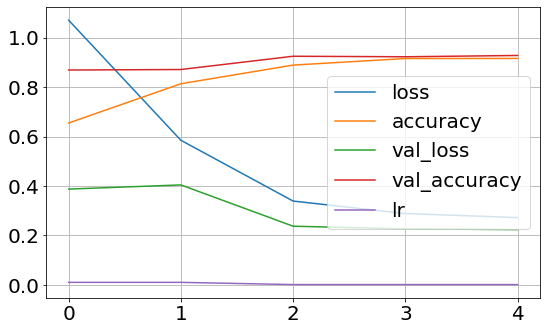

In [ ]:
# Create a figure
pd.DataFrame(history_B0.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing_B0.pdf')
plt.show()

#### **Unfreezing the pretrained layers**

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model_B0.layers:
    # Unfreeze the layer
    layer.trainable = True

#### Compiling the model
A lower learning rate of Adam optimizer (0.001) is used so that it is less likely to compromise the pretrained weights.

In [ ]:
# Compile the model
model_B0.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history_B0 = model_B0.fit(data_train,
                    epochs=12,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/12
238/238 [==============================] - 58s 201ms/step - loss: 0.7470 - accuracy: 0.7889 - val_loss: 0.2469 - val_accuracy: 0.9253 - lr: 0.0010
Epoch 2/12
238/238 [==============================] - 47s 195ms/step - loss: 0.2799 - accuracy: 0.9092 - val_loss: 0.0974 - val_accuracy: 0.9747 - lr: 0.0010
Epoch 3/12
238/238 [==============================] - 47s 195ms/step - loss: 0.1524 - accuracy: 0.9497 - val_loss: 0.0658 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 4/12
238/238 [==============================] - 46s 191ms/step - loss: 0.1418 - accuracy: 0.9539 - val_loss: 0.2440 - val_accuracy: 0.9453 - lr: 0.0010
Epoch 5/12
238/238 [==============================] - 47s 196ms/step - loss: 0.0758 - accuracy: 0.9774 - val_loss: 0.0091 - val_accuracy: 0.9968 - lr: 1.0000e-04
Epoch 6/12
238/238 [==============================] - 47s 195ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0083 - val_accuracy: 0.9979 - lr: 1.0000e-04
Epoch 7/12
238/238 [========================

#### Plotting the learning curve

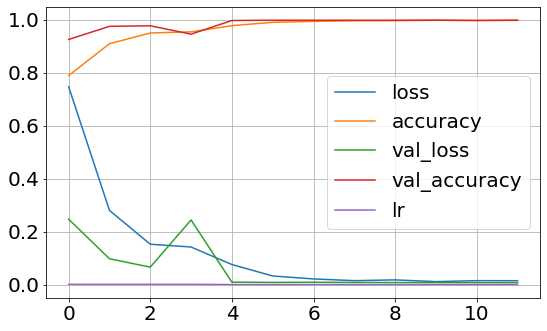

In [ ]:
# Create a figure
pd.DataFrame(history_B0.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing_B0.pdf')
plt.show()

### Training MobileNet

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

#### Building the architecture of the model

In [ ]:
# Add the pretrained layers
pretrained_model_MobileNet = keras.applications.MobileNet(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling_MobileNet = keras.layers.GlobalAveragePooling2D()(pretrained_model_MobileNet.output)

# Add the output layer
output_MobileNet = keras.layers.Dense(n_classes, activation='softmax')(average_pooling_MobileNet)

# Get the model
model_MobileNet = keras.Model(inputs=pretrained_model_MobileNet.input, outputs=output_MobileNet)

model_MobileNet.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128    

#### **Freezing the pretrained layers**

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model_MobileNet.layers:
    # Freeze the layer
    layer.trainable = False

#### Setting Callbacks

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model_MobileNet.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

#### Compiling the model
Keep using the same default learning rate of Adam optimizer (0.01).

In [ ]:
# Compile the model
model_MobileNet.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['accuracy']) 

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history_MobileNet = model_MobileNet.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
238/238 [==============================] - 567s 2s/step - loss: 1.3740 - accuracy: 0.6063 - val_loss: 0.3881 - val_accuracy: 0.8779 - lr: 0.0100
Epoch 2/5
238/238 [==============================] - 30s 125ms/step - loss: 0.7573 - accuracy: 0.7713 - val_loss: 0.5380 - val_accuracy: 0.8232 - lr: 0.0100
Epoch 3/5
238/238 [==============================] - 31s 128ms/step - loss: 0.2946 - accuracy: 0.9082 - val_loss: 0.3656 - val_accuracy: 0.8811 - lr: 1.0000e-03
Epoch 4/5
238/238 [==============================] - 31s 128ms/step - loss: 0.2629 - accuracy: 0.9134 - val_loss: 0.3210 - val_accuracy: 0.8926 - lr: 1.0000e-03
Epoch 5/5
238/238 [==============================] - 30s 125ms/step - loss: 0.2440 - accuracy: 0.9266 - val_loss: 0.3431 - val_accuracy: 0.8874 - lr: 1.0000e-03


#### Plotting the learning curve

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

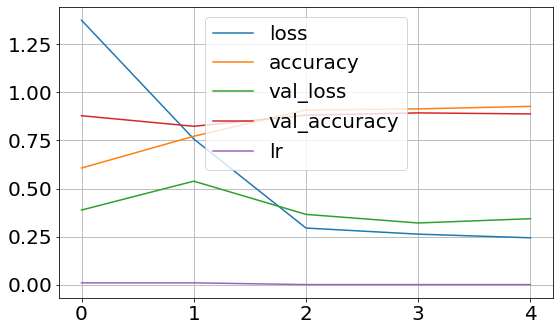

In [ ]:
# Create a figure
pd.DataFrame(history_MobileNet.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing_MobileNet.pdf')
plt.show()

#### **Unfreezing the pretrained layers**

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model_MobileNet.layers:
    # Unfreeze the layer
    layer.trainable = True

#### Compiling the model
Again a lower learning rate of Adam optimizer (0.001) is used so that it is less likely to compromise the pretrained weights.

In [ ]:
# Compile the model
model_MobileNet.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history_MobileNet = model_MobileNet.fit(data_train,
                    epochs=12,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/12
238/238 [==============================] - 37s 140ms/step - loss: 2.4739 - accuracy: 0.7271 - val_loss: 3.5909 - val_accuracy: 0.6147 - lr: 0.0010
Epoch 2/12
238/238 [==============================] - 33s 137ms/step - loss: 0.3829 - accuracy: 0.8947 - val_loss: 2.1042 - val_accuracy: 0.7042 - lr: 0.0010
Epoch 3/12
238/238 [==============================] - 34s 140ms/step - loss: 0.2287 - accuracy: 0.9295 - val_loss: 0.1385 - val_accuracy: 0.9611 - lr: 0.0010
Epoch 4/12
238/238 [==============================] - 34s 139ms/step - loss: 0.2941 - accuracy: 0.9213 - val_loss: 0.3479 - val_accuracy: 0.9358 - lr: 0.0010
Epoch 5/12
238/238 [==============================] - 34s 140ms/step - loss: 0.1014 - accuracy: 0.9650 - val_loss: 0.0144 - val_accuracy: 0.9968 - lr: 1.0000e-04
Epoch 6/12
238/238 [==============================] - 33s 137ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0154 - val_accuracy: 0.9968 - lr: 1.0000e-04
Epoch 7/12
238/238 [========================

#### Plotting the learning curve

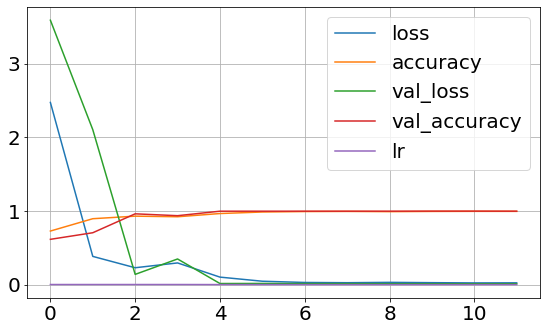

In [ ]:
# Create a figure
pd.DataFrame(history_MobileNet.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing_MobileNet.pdf')
plt.show()

### Training ResNet50V2

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

#### Building the architecture of the model

In [ ]:
# Add the pretrained layers
pretrained_model_B0 = keras.applications.ResNet50V2(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling_B0 = keras.layers.GlobalAveragePooling2D()(pretrained_model_B0.output)

# Add the output layer
output_B0 = keras.layers.Dense(n_classes, activation='softmax')(average_pooling_B0)

# Get the model
model_B0 = keras.Model(inputs=pretrained_model_B0.input, outputs=output_B0)

model_B0.summary()

94683136/94668760 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                             

#### **Freezing the pretrained layers**

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model_B0.layers:
    # Freeze the layer
    layer.trainable = False

#### Setting Callbacks

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model_ResNet50V2.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

#### Compiling the model
Keep using the default learning rate of Adam optimizer (0.01).

In [ ]:
# Compile the model
model_B0.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['accuracy']) 

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history_B0 = model_B0.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
238/238 [==============================] - 319s 1s/step - loss: 130.9636 - accuracy: 0.1403 - val_loss: 153.8928 - val_accuracy: 0.0432 - lr: 0.0100
Epoch 2/5
238/238 [==============================] - 34s 141ms/step - loss: 81.6825 - accuracy: 0.1745 - val_loss: 53.5174 - val_accuracy: 0.0242 - lr: 0.0100
Epoch 3/5
238/238 [==============================] - 34s 142ms/step - loss: 72.6964 - accuracy: 0.2263 - val_loss: 19.8297 - val_accuracy: 0.3821 - lr: 0.0100
Epoch 4/5
238/238 [==============================] - 33s 136ms/step - loss: 75.7217 - accuracy: 0.2292 - val_loss: 102.3139 - val_accuracy: 0.1063 - lr: 0.0100
Epoch 5/5
238/238 [==============================] - 34s 140ms/step - loss: 17.7114 - accuracy: 0.4292 - val_loss: 10.6725 - val_accuracy: 0.4884 - lr: 1.0000e-03


#### Plotting the learning curve

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

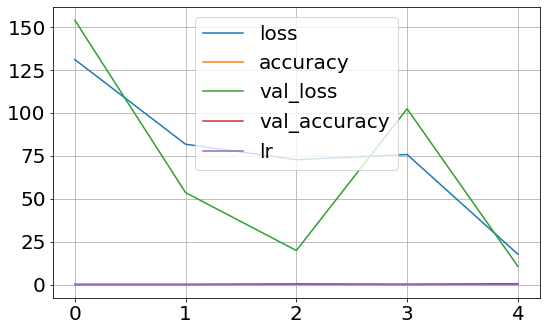

In [ ]:
# Create a figure
pd.DataFrame(history_B0.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing_ResNet50V2.pdf')
plt.show()

#### **Unfreezing the pretrained layers**

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model_B0.layers:
    # Unfreeze the layer
    layer.trainable = True

#### Compiling the model
Again use a lower learning rate of Adam optimizer (0.001) so that it is less likely to compromise the pretrained weights.

In [ ]:
# Compile the model
model_B0.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history_B0 = model_B0.fit(data_train,
                    epochs=12,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/12
238/238 [==============================] - 45s 157ms/step - loss: 1.4255 - accuracy: 0.5961 - val_loss: 5.7969 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 2/12
238/238 [==============================] - 37s 151ms/step - loss: 0.5445 - accuracy: 0.8076 - val_loss: 0.3549 - val_accuracy: 0.8895 - lr: 0.0010
Epoch 3/12
238/238 [==============================] - 36s 147ms/step - loss: 0.3625 - accuracy: 0.8782 - val_loss: 0.5149 - val_accuracy: 0.8253 - lr: 0.0010
Epoch 4/12
238/238 [==============================] - 37s 151ms/step - loss: 0.1607 - accuracy: 0.9474 - val_loss: 0.0505 - val_accuracy: 0.9863 - lr: 1.0000e-04
Epoch 5/12
238/238 [==============================] - 37s 151ms/step - loss: 0.0895 - accuracy: 0.9726 - val_loss: 0.0301 - val_accuracy: 0.9916 - lr: 1.0000e-04
Epoch 6/12
238/238 [==============================] - 37s 152ms/step - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.0235 - val_accuracy: 0.9937 - lr: 1.0000e-04
Epoch 7/12
238/238 [====================

#### Plotting the learning curve

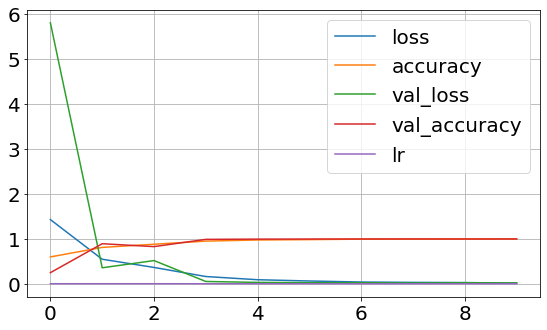

In [ ]:
# Create a figure
pd.DataFrame(history_B0.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing_ResNet50V2.pdf')
plt.show()

### Training InceptionResNetV2

#### Building the architecture of the model

In [ ]:
#inception_resnet_v2.InceptionResNetV2

# Add the pretrained layers
pretrained_InceptionResNetV2 = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling_InceptionResNetV2 = keras.layers.GlobalMaxPooling2D()(pretrained_InceptionResNetV2.output)

# Add the output layer
output_InceptionResNetV2 = keras.layers.Dense(n_classes, activation='softmax')(average_pooling_InceptionResNetV2)

# Get the model
model_InceptionResNetV2 = keras.Model(inputs=pretrained_InceptionResNetV2.input, outputs=output_InceptionResNetV2)

model_InceptionResNetV2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

#### Freezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_InceptionResNetV2.layers:
    # Freeze the layer
    layer.trainable = False

#### Setting Callbacks

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model_InceptionResNetV2.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=2)

#### Compiling the model
Keep using the default learning rate of Adam optimizer (0.01).

In [ ]:
# Compile the model
model_InceptionResNetV2.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['accuracy'])

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history_InceptionResNetV2 = model_InceptionResNetV2.fit(data_train,
                            epochs=5,
                            validation_data=data_valid,
                            callbacks=[model_checkpoint_cb,
                            early_stopping_cb,
                            reduce_lr_on_plateau_cb])

Epoch 1/10
238/238 [==============================] - 109s 362ms/step - loss: 714.0892 - accuracy: 0.1061 - val_loss: 124.2292 - val_accuracy: 0.0526 - lr: 0.0100
Epoch 2/10
238/238 [==============================] - 78s 324ms/step - loss: 540.2664 - accuracy: 0.1134 - val_loss: 201.4254 - val_accuracy: 0.1263 - lr: 0.0100
Epoch 3/10
238/238 [==============================] - 78s 321ms/step - loss: 511.7055 - accuracy: 0.1116 - val_loss: 534.5627 - val_accuracy: 0.5221 - lr: 0.0100


#### Plotting the learning curve

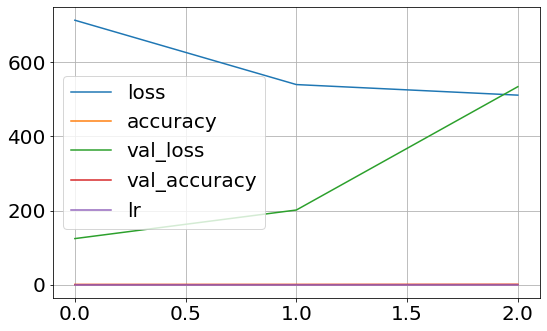

In [ ]:
# Create a figure
pd.DataFrame(history_InceptionResNetV2.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing_InceptionResNetV2.pdf')
plt.show()

#### Unfreezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_InceptionResNetV2.layers:
    # Unfreeze the layer
    layer.trainable = True

#### Compiling the model
Again use a lower learning rate of Adam optimizer (0.001) so that it is less likely to compromise the pretrained weights.

In [ ]:
# Compile the model
model_InceptionResNetV2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history_InceptionResNetV2 = model_InceptionResNetV2.fit(data_train,
                            epochs=15,
                            validation_data=data_valid,
                            callbacks=[model_checkpoint_cb,
                            early_stopping_cb,
                            reduce_lr_on_plateau_cb])

Epoch 1/10
238/238 [==============================] - 235s 881ms/step - loss: 2.2005 - accuracy: 0.5950 - val_loss: 19.1789 - val_accuracy: 0.3105 - lr: 0.0010
Epoch 2/10
238/238 [==============================] - 204s 853ms/step - loss: 0.7065 - accuracy: 0.8192 - val_loss: 0.5321 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 3/10
238/238 [==============================] - 201s 839ms/step - loss: 0.8345 - accuracy: 0.8063 - val_loss: 8.9762 - val_accuracy: 0.7095 - lr: 0.0010
Epoch 4/10
238/238 [==============================] - 201s 838ms/step - loss: 0.4888 - accuracy: 0.8650 - val_loss: 6.6958 - val_accuracy: 0.6537 - lr: 0.0010


#### Plotting the learning curve

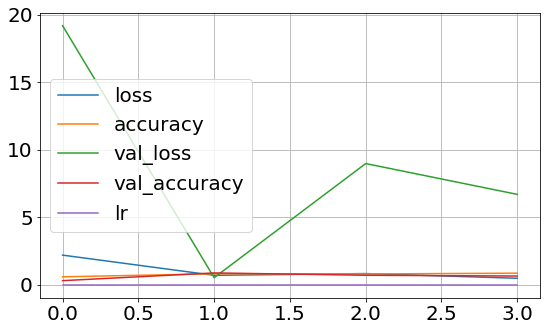

In [ ]:
# Create a figure
pd.DataFrame(history_InceptionResNetV2.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing_InceptionResNetV2.pdf')
plt.show()

### Training VGG16

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model3/')
if not os.path.exists(directory):
    os.makedirs(directory)

#### Building the architecture of the model

In [ ]:
# Add the pretrained layers
pretrained_model = keras.applications.VGG16(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

#### Freezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

#### Setting Callbacks

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model3/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

#### Compiling the model
Keep using the default learning rate of Adam optimizer (0.01).

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), 
             metrics=['accuracy']) 

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
238/238 [==============================] - 31s 112ms/step - loss: 1.6129 - accuracy: 0.5234 - val_loss: 1.2159 - val_accuracy: 0.5800 - lr: 0.0100
Epoch 2/5
238/238 [==============================] - 24s 100ms/step - loss: 0.7761 - accuracy: 0.7363 - val_loss: 0.4929 - val_accuracy: 0.8484 - lr: 0.0100
Epoch 3/5
238/238 [==============================] - 24s 99ms/step - loss: 0.6244 - accuracy: 0.7955 - val_loss: 0.8338 - val_accuracy: 0.7568 - lr: 0.0100
Epoch 4/5
238/238 [==============================] - 24s 101ms/step - loss: 0.4730 - accuracy: 0.8503 - val_loss: 0.3885 - val_accuracy: 0.8926 - lr: 1.0000e-03
Epoch 5/5
238/238 [==============================] - 24s 100ms/step - loss: 0.4490 - accuracy: 0.8579 - val_loss: 0.3887 - val_accuracy: 0.8895 - lr: 1.0000e-03


#### Plotting the learning curve

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

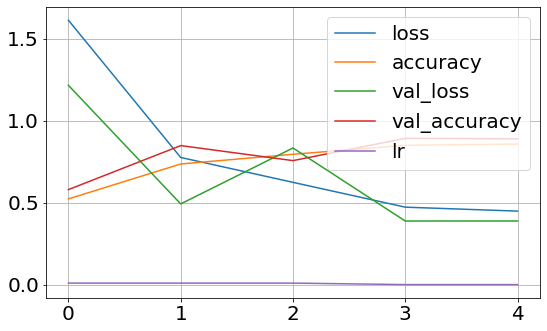

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing-model3.pdf')
plt.show()

#### Unfreezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

#### Compiling the model
Again use a lower learning rate of Adam optimizer (0.001) so that it is less likely to compromise the pretrained weights.

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=1000,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/1000
238/238 [==============================] - 62s 243ms/step - loss: 0.6613 - accuracy: 0.7874 - val_loss: 0.3304 - val_accuracy: 0.8937 - lr: 0.0010
Epoch 2/1000
238/238 [==============================] - 57s 239ms/step - loss: 0.2277 - accuracy: 0.9237 - val_loss: 0.1124 - val_accuracy: 0.9621 - lr: 0.0010
Epoch 3/1000
238/238 [==============================] - 56s 236ms/step - loss: 0.1037 - accuracy: 0.9639 - val_loss: 0.0970 - val_accuracy: 0.9737 - lr: 0.0010
Epoch 4/1000
238/238 [==============================] - 56s 236ms/step - loss: 0.0612 - accuracy: 0.9829 - val_loss: 0.0498 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 5/1000
238/238 [==============================] - 58s 242ms/step - loss: 0.0295 - accuracy: 0.9921 - val_loss: 0.0290 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 6/1000
238/238 [==============================] - 57s 241ms/step - loss: 0.0651 - accuracy: 0.9853 - val_loss: 0.0247 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 7/1000
238/238 [==================

#### Plotting the learning curve

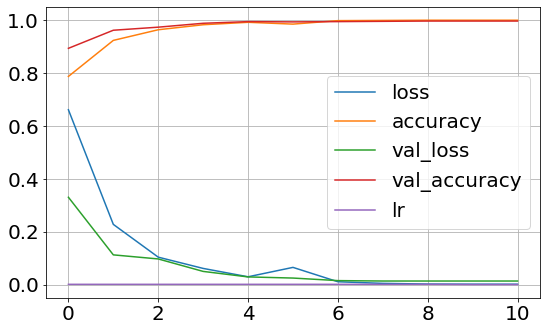

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing_model3.pdf')
plt.show()

### Training EfficientNetV2B2

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

#### Building the architecture of the model

In [ ]:
# Add the pretrained layers
pretrained_model = keras.applications.EfficientNetV2B2(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   0           ['rescaling[0][0]']              
                                3)                                                            

 block2c_expand_activation (Act  (None, None, None,   0          ['block2c_expand_bn[0][0]']      
 ivation)                       128)                                                              
                                                                                                  
 block2c_project_conv (Conv2D)  (None, None, None,   4096        ['block2c_expand_activation[0][0]
                                32)                              ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, None, None,   128        ['block2c_project_conv[0][0]']   
 lization)                      32)                                                               
                                                                                                  
 block2c_add (Add)              (None, None, None,   0           ['block2c_project_bn[0][0]',     
          

                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 224)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 14)     3150        ['block4a_se_reshape[0][0]']     
                                                                                                  
 block4a_se_expand (Conv2D)     (None, 1, 1, 224)    3360        ['block4a_se_reduce[0][0]']      
                                                                                                  
 block4a_se_excite (Multiply)   (None, None, None,   0           ['block4a_activation[0][0]',     
                                224)                              'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_p

                                416)                              'block4c_se_expand[0][0]']      
                                                                                                  
 block4c_project_conv (Conv2D)  (None, None, None,   43264       ['block4c_se_excite[0][0]']      
                                104)                                                              
                                                                                                  
 block4c_project_bn (BatchNorma  (None, None, None,   416        ['block4c_project_conv[0][0]']   
 lization)                      104)                                                              
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_project_bn[0][0]',     
                                104)                              'block4b_add[0][0]']            
          

 block5a_project_bn (BatchNorma  (None, None, None,   480        ['block5a_project_conv[0][0]']   
 lization)                      120)                                                              
                                                                                                  
 block5b_expand_conv (Conv2D)   (None, None, None,   86400       ['block5a_project_bn[0][0]']     
                                720)                                                              
                                                                                                  
 block5b_expand_bn (BatchNormal  (None, None, None,   2880       ['block5b_expand_conv[0][0]']    
 ization)                       720)                                                              
                                                                                                  
 block5b_expand_activation (Act  (None, None, None,   0          ['block5b_expand_bn[0][0]']      
 ivation) 

                                                                                                  
 block5d_expand_bn (BatchNormal  (None, None, None,   2880       ['block5d_expand_conv[0][0]']    
 ization)                       720)                                                              
                                                                                                  
 block5d_expand_activation (Act  (None, None, None,   0          ['block5d_expand_bn[0][0]']      
 ivation)                       720)                                                              
                                                                                                  
 block5d_dwconv2 (DepthwiseConv  (None, None, None,   6480       ['block5d_expand_activation[0][0]
 2D)                            720)                             ']                               
                                                                                                  
 block5d_b

 ivation)                       720)                                                              
                                                                                                  
 block5f_dwconv2 (DepthwiseConv  (None, None, None,   6480       ['block5f_expand_activation[0][0]
 2D)                            720)                             ']                               
                                                                                                  
 block5f_bn (BatchNormalization  (None, None, None,   2880       ['block5f_dwconv2[0][0]']        
 )                              720)                                                              
                                                                                                  
 block5f_activation (Activation  (None, None, None,   0          ['block5f_bn[0][0]']             
 )                              720)                                                              
          

 block6b_activation (Activation  (None, None, None,   0          ['block6b_bn[0][0]']             
 )                              1248)                                                             
                                                                                                  
 block6b_se_squeeze (GlobalAver  (None, 1248)        0           ['block6b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6b_se_reshape (Reshape)   (None, 1, 1, 1248)   0           ['block6b_se_squeeze[0][0]']     
                                                                                                  
 block6b_se_reduce (Conv2D)     (None, 1, 1, 52)     64948       ['block6b_se_reshape[0][0]']     
                                                                                                  
 block6b_s

                                                                                                  
 block6d_se_reshape (Reshape)   (None, 1, 1, 1248)   0           ['block6d_se_squeeze[0][0]']     
                                                                                                  
 block6d_se_reduce (Conv2D)     (None, 1, 1, 52)     64948       ['block6d_se_reshape[0][0]']     
                                                                                                  
 block6d_se_expand (Conv2D)     (None, 1, 1, 1248)   66144       ['block6d_se_reduce[0][0]']      
                                                                                                  
 block6d_se_excite (Multiply)   (None, None, None,   0           ['block6d_activation[0][0]',     
                                1248)                             'block6d_se_expand[0][0]']      
                                                                                                  
 block6d_p

 block6f_se_expand (Conv2D)     (None, 1, 1, 1248)   66144       ['block6f_se_reduce[0][0]']      
                                                                                                  
 block6f_se_excite (Multiply)   (None, None, None,   0           ['block6f_activation[0][0]',     
                                1248)                             'block6f_se_expand[0][0]']      
                                                                                                  
 block6f_project_conv (Conv2D)  (None, None, None,   259584      ['block6f_se_excite[0][0]']      
                                208)                                                              
                                                                                                  
 block6f_project_bn (BatchNorma  (None, None, None,   832        ['block6f_project_conv[0][0]']   
 lization)                      208)                                                              
          

 block6h_project_conv (Conv2D)  (None, None, None,   259584      ['block6h_se_excite[0][0]']      
                                208)                                                              
                                                                                                  
 block6h_project_bn (BatchNorma  (None, None, None,   832        ['block6h_project_conv[0][0]']   
 lization)                      208)                                                              
                                                                                                  
 block6h_add (Add)              (None, None, None,   0           ['block6h_project_bn[0][0]',     
                                208)                              'block6g_add[0][0]']            
                                                                                                  
 block6i_expand_conv (Conv2D)   (None, None, None,   259584      ['block6h_add[0][0]']            
          

                                                                                                  
 block6j_add (Add)              (None, None, None,   0           ['block6j_project_bn[0][0]',     
                                208)                              'block6i_add[0][0]']            
                                                                                                  
 top_conv (Conv2D)              (None, None, None,   292864      ['block6j_add[0][0]']            
                                1408)                                                             
                                                                                                  
 top_bn (BatchNormalization)    (None, None, None,   5632        ['top_conv[0][0]']               
                                1408)                                                             
                                                                                                  
 top_activ

#### Freezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

#### Setting Callbacks

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

#### Compiling the model
Keep using the default learning rate of Adam optimizer (0.01).

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['accuracy']) 

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
238/238 [==============================] - 35s 81ms/step - loss: 0.8868 - accuracy: 0.7132 - val_loss: 0.2867 - val_accuracy: 0.9095 - lr: 0.0100
Epoch 2/5
238/238 [==============================] - 15s 63ms/step - loss: 0.3796 - accuracy: 0.8747 - val_loss: 0.4075 - val_accuracy: 0.8874 - lr: 0.0100
Epoch 3/5
238/238 [==============================] - 15s 64ms/step - loss: 0.1715 - accuracy: 0.9479 - val_loss: 0.1659 - val_accuracy: 0.9568 - lr: 1.0000e-03
Epoch 4/5
238/238 [==============================] - 16s 66ms/step - loss: 0.1368 - accuracy: 0.9613 - val_loss: 0.1510 - val_accuracy: 0.9684 - lr: 1.0000e-03
Epoch 5/5
238/238 [==============================] - 16s 65ms/step - loss: 0.1269 - accuracy: 0.9671 - val_loss: 0.1448 - val_accuracy: 0.9695 - lr: 1.0000e-03


#### Plotting the learning curve

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

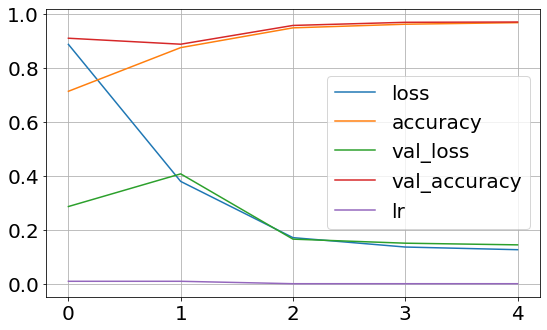

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing-test2.pdf')
plt.show()

#### Unfreezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

#### Compiling the model
Again use a lower learning rate of Adam optimizer (0.001) so that it is less likely to compromise the pretrained weights.

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=12,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/12
238/238 [==============================] - 60s 191ms/step - loss: 0.6270 - accuracy: 0.8179 - val_loss: 0.1438 - val_accuracy: 0.9589 - lr: 0.0010
Epoch 2/12
238/238 [==============================] - 42s 177ms/step - loss: 0.2241 - accuracy: 0.9229 - val_loss: 0.1040 - val_accuracy: 0.9621 - lr: 0.0010
Epoch 3/12
238/238 [==============================] - 43s 178ms/step - loss: 0.1571 - accuracy: 0.9479 - val_loss: 0.0191 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 4/12
238/238 [==============================] - 43s 181ms/step - loss: 0.1561 - accuracy: 0.9484 - val_loss: 0.0309 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 5/12
238/238 [==============================] - 43s 180ms/step - loss: 0.0412 - accuracy: 0.9855 - val_loss: 0.0150 - val_accuracy: 0.9979 - lr: 1.0000e-04
Epoch 6/12
238/238 [==============================] - 42s 177ms/step - loss: 0.0175 - accuracy: 0.9961 - val_loss: 0.0138 - val_accuracy: 0.9979 - lr: 1.0000e-04
Epoch 7/12
238/238 [========================

#### Plotting the learning curve

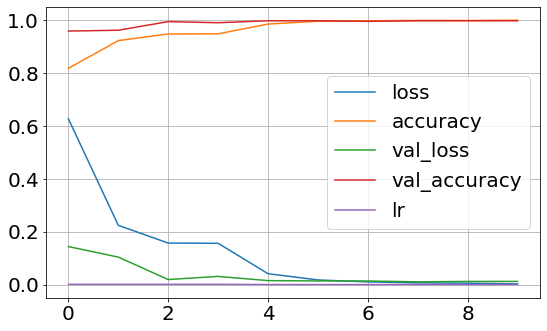

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing.pdf')
plt.show()

### Training EfficientNetV2S

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model2/')
if not os.path.exists(directory):
    os.makedirs(directory)

#### Building the architecture of the model

In [ ]:
# Add the pretrained layers
pretrained_model = keras.applications.EfficientNetV2S(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

82436096/82420632 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, None, None,   648         ['rescaling[0][0]']              
                             

 ization)                       192)                                                              
                                                                                                  
 block2c_expand_activation (Act  (None, None, None,   0          ['block2c_expand_bn[0][0]']      
 ivation)                       192)                                                              
                                                                                                  
 block2c_project_conv (Conv2D)  (None, None, None,   9216        ['block2c_expand_activation[0][0]
                                48)                              ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, None, None,   192        ['block2c_project_conv[0][0]']   
 lization)                      48)                                                               
          

 block3d_expand_conv (Conv2D)   (None, None, None,   147456      ['block3c_add[0][0]']            
                                256)                                                              
                                                                                                  
 block3d_expand_bn (BatchNormal  (None, None, None,   1024       ['block3d_expand_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 block3d_expand_activation (Act  (None, None, None,   0          ['block3d_expand_bn[0][0]']      
 ivation)                       256)                                                              
                                                                                                  
 block3d_project_conv (Conv2D)  (None, None, None,   16384       ['block3d_expand_activation[0][0]
          

                                                                                                  
 block4b_project_conv (Conv2D)  (None, None, None,   65536       ['block4b_se_excite[0][0]']      
                                128)                                                              
                                                                                                  
 block4b_project_bn (BatchNorma  (None, None, None,   512        ['block4b_project_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 block4b_add (Add)              (None, None, None,   0           ['block4b_project_bn[0][0]',     
                                128)                              'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_e

 lization)                      128)                                                              
                                                                                                  
 block4d_add (Add)              (None, None, None,   0           ['block4d_project_bn[0][0]',     
                                128)                              'block4c_add[0][0]']            
                                                                                                  
 block4e_expand_conv (Conv2D)   (None, None, None,   65536       ['block4d_add[0][0]']            
                                512)                                                              
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, None, None,   2048       ['block4e_expand_conv[0][0]']    
 ization)                       512)                                                              
          

 block5a_expand_conv (Conv2D)   (None, None, None,   98304       ['block4f_add[0][0]']            
                                768)                                                              
                                                                                                  
 block5a_expand_bn (BatchNormal  (None, None, None,   3072       ['block5a_expand_conv[0][0]']    
 ization)                       768)                                                              
                                                                                                  
 block5a_expand_activation (Act  (None, None, None,   0          ['block5a_expand_bn[0][0]']      
 ivation)                       768)                                                              
                                                                                                  
 block5a_dwconv2 (DepthwiseConv  (None, None, None,   6912       ['block5a_expand_activation[0][0]
 2D)      

                                                                                                  
 block5c_dwconv2 (DepthwiseConv  (None, None, None,   8640       ['block5c_expand_activation[0][0]
 2D)                            960)                             ']                               
                                                                                                  
 block5c_bn (BatchNormalization  (None, None, None,   3840       ['block5c_dwconv2[0][0]']        
 )                              960)                                                              
                                                                                                  
 block5c_activation (Activation  (None, None, None,   0          ['block5c_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block5c_s

 )                              960)                                                              
                                                                                                  
 block5e_activation (Activation  (None, None, None,   0          ['block5e_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 960)         0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_s

 block5g_se_squeeze (GlobalAver  (None, 960)         0           ['block5g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5g_se_reshape[0][0]']     
                                                                                                  
 block5g_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5g_se_reduce[0][0]']      
                                                                                                  
 block5g_se_excite (Multiply)   (None, None, None,   0           ['block5g_activation[0][0]',     
          

 block5i_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5i_se_reshape[0][0]']     
                                                                                                  
 block5i_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5i_se_reduce[0][0]']      
                                                                                                  
 block5i_se_excite (Multiply)   (None, None, None,   0           ['block5i_activation[0][0]',     
                                960)                              'block5i_se_expand[0][0]']      
                                                                                                  
 block5i_project_conv (Conv2D)  (None, None, None,   153600      ['block5i_se_excite[0][0]']      
                                160)                                                              
                                                                                                  
 block5i_p

                                256)                                                              
                                                                                                  
 block6b_project_bn (BatchNorma  (None, None, None,   1024       ['block6b_project_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 block6b_add (Add)              (None, None, None,   0           ['block6b_project_bn[0][0]',     
                                256)                              'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, None, None,   393216      ['block6b_add[0][0]']            
                                1536)                                                             
          

 block6d_add (Add)              (None, None, None,   0           ['block6d_project_bn[0][0]',     
                                256)                              'block6c_add[0][0]']            
                                                                                                  
 block6e_expand_conv (Conv2D)   (None, None, None,   393216      ['block6d_add[0][0]']            
                                1536)                                                             
                                                                                                  
 block6e_expand_bn (BatchNormal  (None, None, None,   6144       ['block6e_expand_conv[0][0]']    
 ization)                       1536)                                                             
                                                                                                  
 block6e_expand_activation (Act  (None, None, None,   0          ['block6e_expand_bn[0][0]']      
 ivation) 

                                                                                                  
 block6g_expand_bn (BatchNormal  (None, None, None,   6144       ['block6g_expand_conv[0][0]']    
 ization)                       1536)                                                             
                                                                                                  
 block6g_expand_activation (Act  (None, None, None,   0          ['block6g_expand_bn[0][0]']      
 ivation)                       1536)                                                             
                                                                                                  
 block6g_dwconv2 (DepthwiseConv  (None, None, None,   13824      ['block6g_expand_activation[0][0]
 2D)                            1536)                            ']                               
                                                                                                  
 block6g_b

 ivation)                       1536)                                                             
                                                                                                  
 block6i_dwconv2 (DepthwiseConv  (None, None, None,   13824      ['block6i_expand_activation[0][0]
 2D)                            1536)                            ']                               
                                                                                                  
 block6i_bn (BatchNormalization  (None, None, None,   6144       ['block6i_dwconv2[0][0]']        
 )                              1536)                                                             
                                                                                                  
 block6i_activation (Activation  (None, None, None,   0          ['block6i_bn[0][0]']             
 )                              1536)                                                             
          

 block6k_bn (BatchNormalization  (None, None, None,   6144       ['block6k_dwconv2[0][0]']        
 )                              1536)                                                             
                                                                                                  
 block6k_activation (Activation  (None, None, None,   0          ['block6k_bn[0][0]']             
 )                              1536)                                                             
                                                                                                  
 block6k_se_squeeze (GlobalAver  (None, 1536)        0           ['block6k_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6k_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6k_se_squeeze[0][0]']     
          

                                                                                                  
 block6m_se_squeeze (GlobalAver  (None, 1536)        0           ['block6m_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6m_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6m_se_squeeze[0][0]']     
                                                                                                  
 block6m_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6m_se_reshape[0][0]']     
                                                                                                  
 block6m_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6m_se_reduce[0][0]']      
                                                                                                  
 block6m_s

                                                                                                  
 block6o_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6o_se_reshape[0][0]']     
                                                                                                  
 block6o_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6o_se_reduce[0][0]']      
                                                                                                  
 block6o_se_excite (Multiply)   (None, None, None,   0           ['block6o_activation[0][0]',     
                                1536)                             'block6o_se_expand[0][0]']      
                                                                                                  
 block6o_project_conv (Conv2D)  (None, None, None,   393216      ['block6o_se_excite[0][0]']      
                                256)                                                              
          

#### Freezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

#### Setting Callbacks

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model2/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

#### Compiling the model
Keep using the default learning rate of Adam optimizer (0.01).

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['accuracy']) 

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
238/238 [==============================] - 50s 131ms/step - loss: 0.9255 - accuracy: 0.6961 - val_loss: 0.4756 - val_accuracy: 0.8442 - lr: 0.0100
Epoch 2/5
238/238 [==============================] - 26s 110ms/step - loss: 0.4225 - accuracy: 0.8603 - val_loss: 0.3105 - val_accuracy: 0.8968 - lr: 0.0100
Epoch 3/5
238/238 [==============================] - 26s 108ms/step - loss: 0.3116 - accuracy: 0.8950 - val_loss: 0.3398 - val_accuracy: 0.8747 - lr: 0.0100
Epoch 4/5
238/238 [==============================] - 28s 117ms/step - loss: 0.1749 - accuracy: 0.9458 - val_loss: 0.1376 - val_accuracy: 0.9600 - lr: 1.0000e-03
Epoch 5/5
238/238 [==============================] - 28s 116ms/step - loss: 0.1436 - accuracy: 0.9632 - val_loss: 0.1294 - val_accuracy: 0.9653 - lr: 1.0000e-03


#### Plotting the learning curve

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

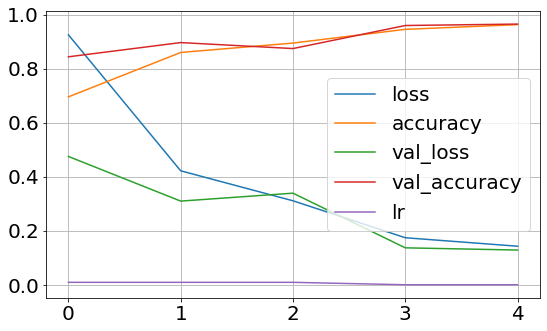

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing-model2.pdf')
plt.show()

#### Unfreezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

#### Compiling the model
Again use a lower learning rate of Adam optimizer (0.001) so that it is less likely to compromise the pretrained weights.

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=12,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/12
238/238 [==============================] - 103s 341ms/step - loss: 0.7657 - accuracy: 0.7895 - val_loss: 0.2040 - val_accuracy: 0.9484 - lr: 0.0010
Epoch 2/12
238/238 [==============================] - 74s 310ms/step - loss: 0.2373 - accuracy: 0.9184 - val_loss: 0.2291 - val_accuracy: 0.9337 - lr: 0.0010
Epoch 3/12
238/238 [==============================] - 74s 311ms/step - loss: 0.0928 - accuracy: 0.9682 - val_loss: 0.0211 - val_accuracy: 0.9926 - lr: 1.0000e-04
Epoch 4/12
238/238 [==============================] - 74s 311ms/step - loss: 0.0382 - accuracy: 0.9887 - val_loss: 0.0096 - val_accuracy: 0.9958 - lr: 1.0000e-04
Epoch 5/12
238/238 [==============================] - 75s 315ms/step - loss: 0.0227 - accuracy: 0.9939 - val_loss: 0.0087 - val_accuracy: 0.9968 - lr: 1.0000e-04
Epoch 6/12
238/238 [==============================] - 75s 316ms/step - loss: 0.0119 - accuracy: 0.9966 - val_loss: 0.0086 - val_accuracy: 0.9968 - lr: 1.0000e-04
Epoch 7/12
238/238 [===============

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=20,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/20
238/238 [==============================] - 75s 313ms/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.0073 - val_accuracy: 0.9979 - lr: 1.0000e-08
Epoch 2/20
238/238 [==============================] - 75s 313ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0068 - val_accuracy: 0.9979 - lr: 1.0000e-08
Epoch 3/20
238/238 [==============================] - 74s 310ms/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0070 - val_accuracy: 0.9979 - lr: 1.0000e-08
Epoch 4/20
238/238 [==============================] - 74s 312ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.0094 - val_accuracy: 0.9968 - lr: 1.0000e-09


#### Plotting the learning curve

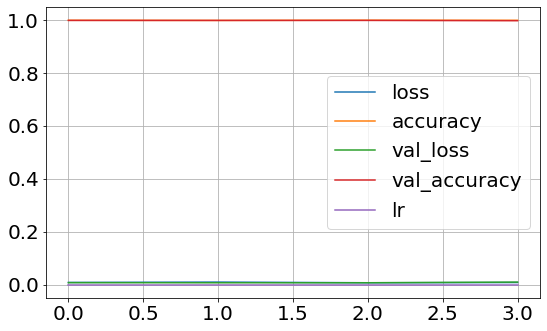

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing_model2.pdf')
plt.show()

## Test section

### Load the best model
Use the best model selected earlier to generate the submission file for this kaggle competition. 

This part of code is just a sample to show how to creat the submission file for ResNet50V2 model.

In [ ]:
# Load the saved model
model_B0.load_weights(filepath=abspath_curr + '/result/model/model_ResNet50V2.h5')

### Make the prediction

In [ ]:
# Make the prediction
prediction = model_B0.predict(data_test)

### Prepare prediction results

In [ ]:
#Prepare prediction results
predict_class = []
for pred in prediction: 
    predict_class.append(class_names[tf.argmax(pred)])

### Create the submission file

In [ ]:
# Create the result dataframe
submission = pd.DataFrame({'file':sample_submission['file'],'species':predict_class})

# Save the dataframe to submission file
submission.to_csv(abspath_curr + '/submission_ResNet50V2.csv', index=False)

# Check the head of submission file
submission.head()

,file,species
0,0021e90e4.png,Small-flowered Cranesbill
1,003d61042.png,Fat Hen
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Common Chickweed
4,00c47e980.png,Sugar beet


### Discussion of Empirical Results

For the discussion of empirical results, I am here comparing the performances of the models

I have uploaded the submission file for these seven models and get the final score(accuracy) of each model on the test data.

The figure below shows how these seven models perform. 

The best model is EfficientNetV2S which has an accuracy of 96.7%, and the worst model is InceptionResNetV2 which only has an 89.3% accuracy.

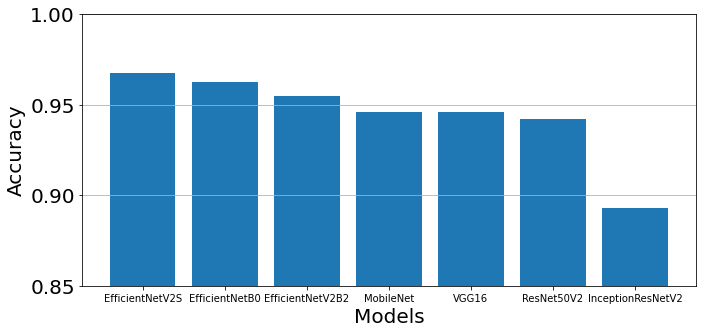

In [ ]:
# Accuracy for each model
df_result = pd.DataFrame({'model': ['EfficientNetV2S', 'EfficientNetB0', 'EfficientNetV2B2', 'MobileNet', 'VGG16', 'ResNet50V2', 'InceptionResNetV2'],
                   'accuracy': [0.96725, 0.96221, 0.95465, 0.94584, 0.94584, 0.94206, 0.89294]})

# Show the figure
plt.figure(figsize=(11, 5))
plt.bar(df_result['model'], df_result['accuracy'])
plt.ylim((0.85, 1))
plt.grid(axis='y')
plt.tick_params(axis='x', labelsize=10)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Conclusion

- In this project, I test how these seven models perform in the Kaggle seed prediction competition. Different models have different structures and performances. From the performances, the family of EfficientNet models performs so well. The best one EfficientNetV2S has an accuracy of over 96% compared to the worst one InceptionResNetV2 which only has an accuracy of 89%. For the time cost, the EfficientNet family costs around 40-50 seconds per epoch, and the ResNet or MobileNet cost around 30-40 seconds per epoch depending on the Google Colab. Time is money and accuracy is money too. Considering the tradeoff in time and accuracy, I think EfficientNetV2S and MobileNet are the best two choices for this seed prediction project. EfficientNetV2S has the highest accuracy and good speed, and MobileNet has the fastest speed and good accuracy.

- I also found that different pre-trained models need different optimizers in compiling the models. VGG16 needs the SGD function for the optimizer, otherwise, its performance will be very, very poor. But other models only need the Adam function. This point is something I overlooked in the previous study.

- Finally, I still have a lot of room for improvement. In this project, I only add an average pooling layer after each pre-trained model. The structures are too simple. In the future, maybe I can add more layers after the pre-trained models, or try to create a new and better model structure for this seed prediction question.

# Reference

1. Chauhan, B. S. (1AD, January 1). Grand challenges in weed management. Frontiers. Retrieved April 24, 2022, from https://www.frontiersin.org/articles/10.3389/fagro.2019.00003/full#:~:text=In%20general%2C%20weeds%20present%20the,water%2C%20nutrients%2C%20and%20space.